### Company Background
Discount Motors is a used car dealership in the UK. They want to lead the way in used cars.
Selling to customers who want the latest and greatest features, without the price tag of a
brand new car.

The UK Government has now announced that from 2030 all new cars will be required to be
zero emissions. Although this won’t impact the used car market, it is expected that buyers will
give more consideration to the future value of their cars. And petrol and diesel will likely have
a much lower value after 2030.

### UK Used Car Sales
The details in the data reflect the information given to potential buyers in the website adverts.
Buyers typically want to know the road tax of a used car, which varies based on a
combination of year registered, emissions and fuel type, with Electric cars currently exempt
from road tax.
Example

### Problem Statement

**1. The team estimates are always around 30% off**

**2. They want the estimates to be within 10% of the price**

**3. Automate the whole process and be able to sell cars quicker**

First lets load needed libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


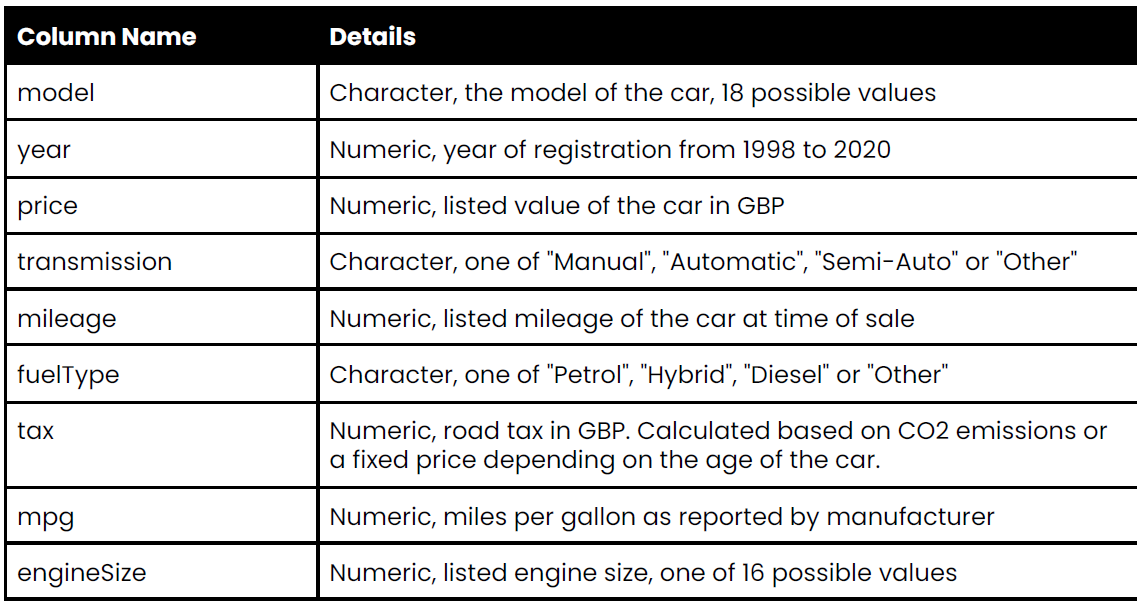

In [3]:
df.shape

(6738, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


## **Data Cleaning and Wrangling**

### Lets check for null values

In [5]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

### No Null values 

In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [7]:
# Lets check the correlation
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.420959,-0.727749,0.283455,-0.020607,-0.045567
price,0.420959,1.000000,-0.297936,0.214498,-0.039910,0.727592
mileage,-0.727749,-0.297936,1.000000,-0.205285,0.044889,0.182615
tax,0.283455,0.214498,-0.205285,1.000000,-0.430292,0.155727
mpg,-0.020607,-0.039910,0.044889,-0.430292,1.000000,-0.106868
engineSize,-0.045567,0.727592,0.182615,0.155727,-0.106868,1.000000


## Exploratory Data Analysis

### Lets visualize the Numeric Distribution

In [8]:
numCols = df.select_dtypes([np.number]).columns.drop("price")
numCols

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

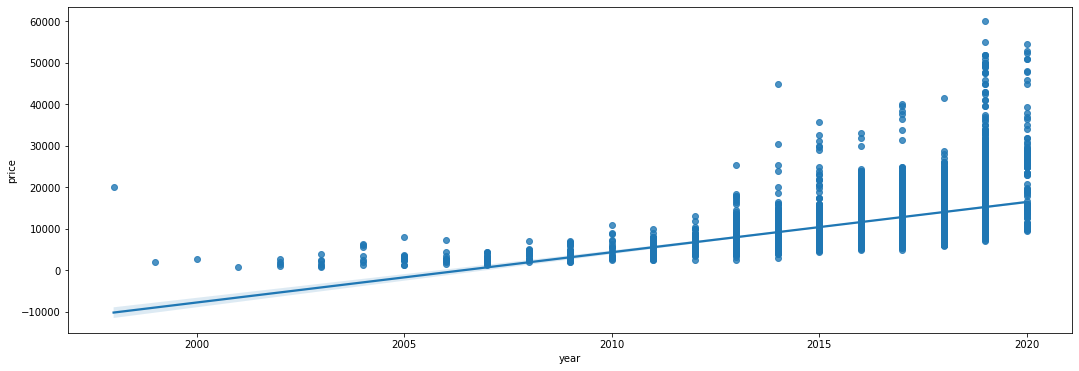

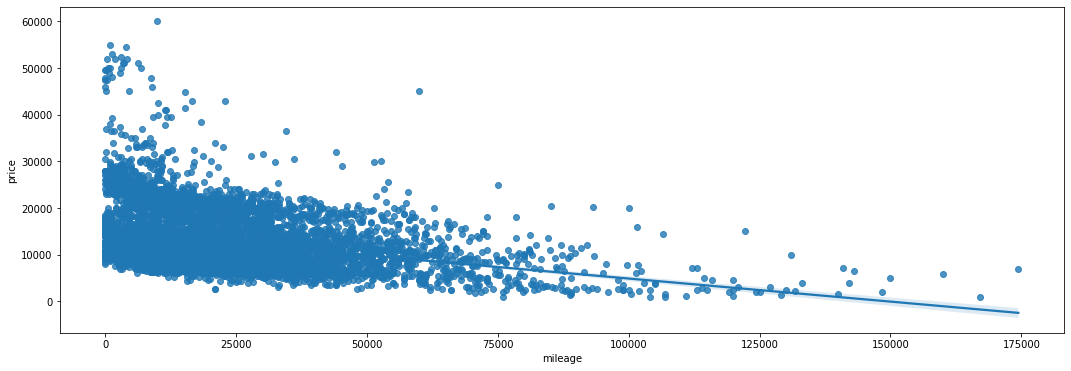

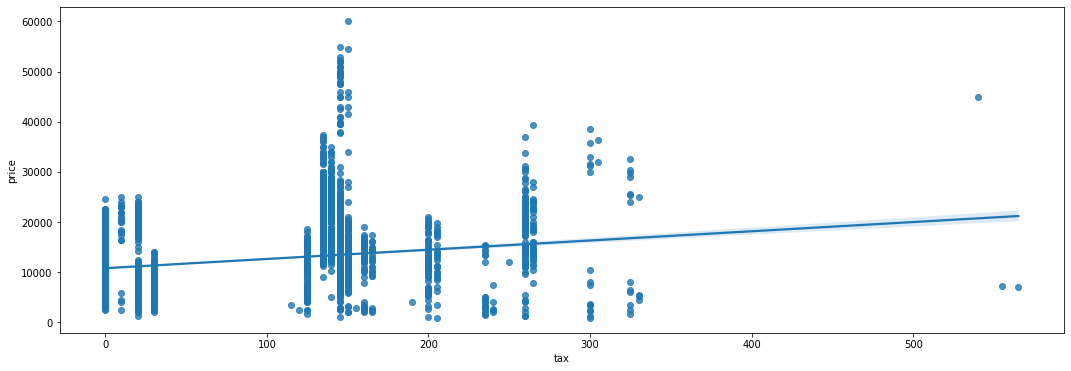

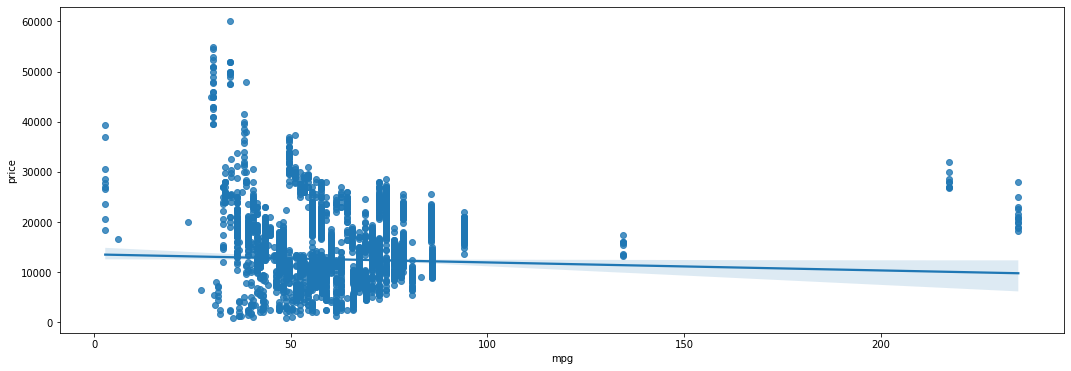

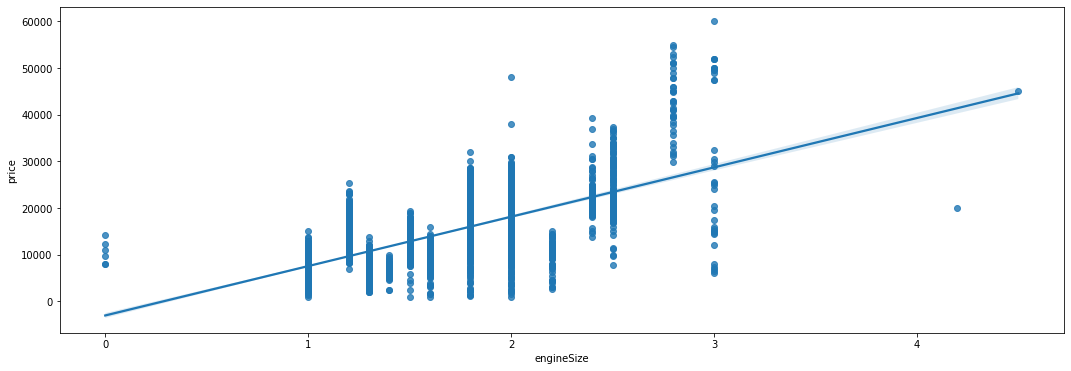

In [9]:
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.regplot(x=col, y="price", data=df)
    plt.show()

### Lets check for outliers on our numeric column

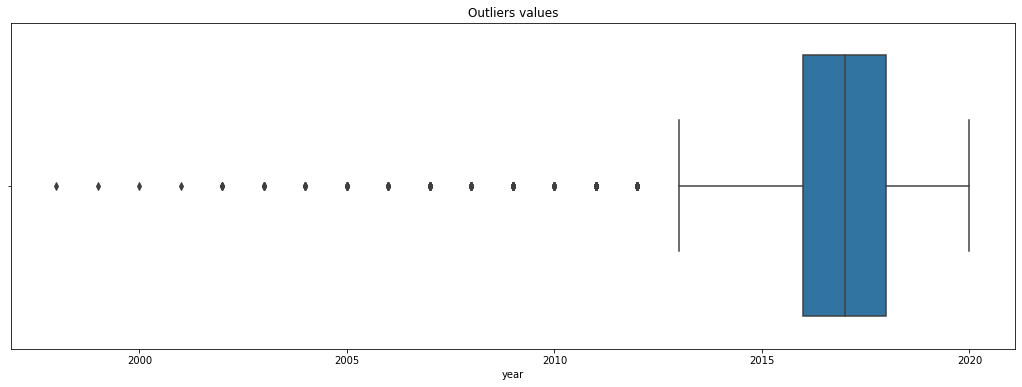

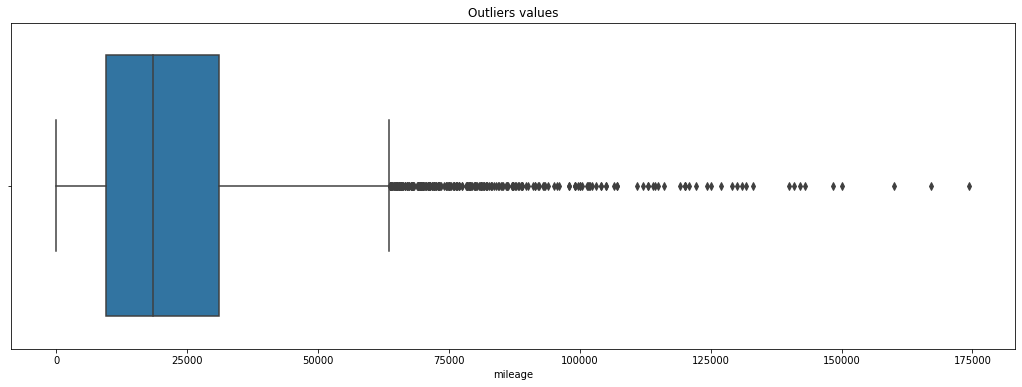

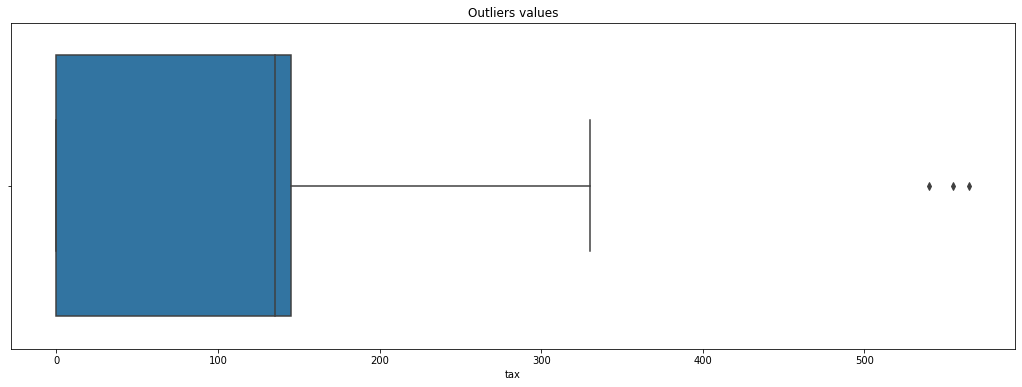

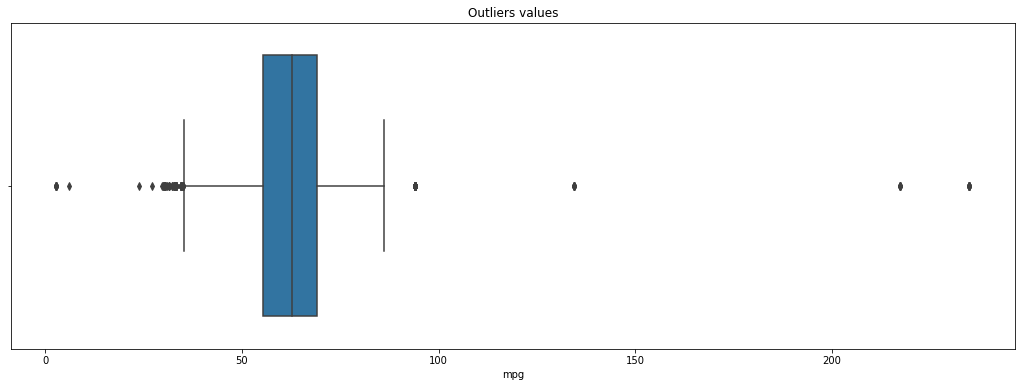

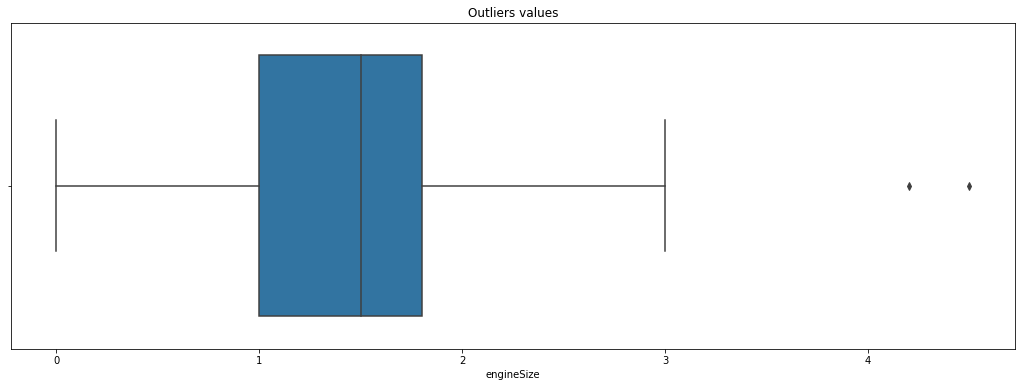

In [10]:
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.boxplot(x=col,data=df)
    plt.title('Outliers values')
    plt.show()

In [11]:
# Lets get a copy
df1 = df.copy()

### Correlation

<AxesSubplot:>

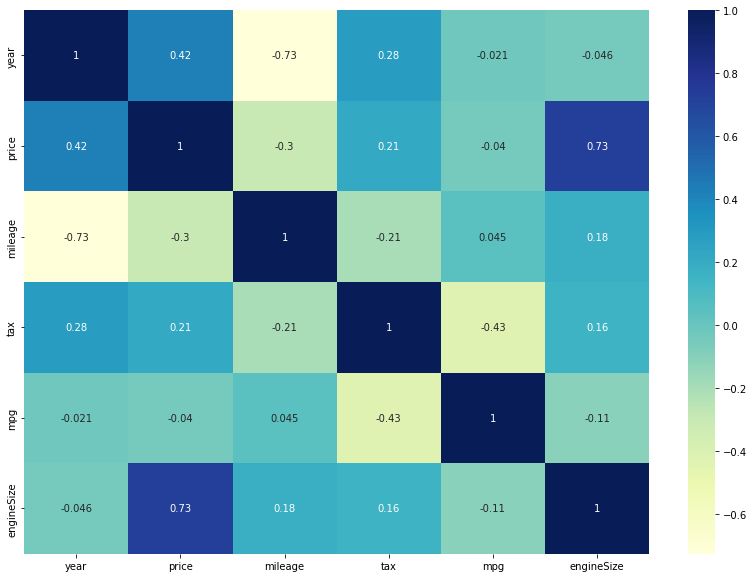

In [12]:
plt.figure(figsize = (14,10))
sns.heatmap(df1.corr() , annot = True , cmap = "YlGnBu")

### Feature Selection for numeric columns

In [13]:
round(abs(df1.corr()['price']*100).sort_values(ascending=False), 2)

price         100.00
engineSize     72.76
year           42.10
mileage        29.79
tax            21.45
mpg             3.99
Name: price, dtype: float64

<AxesSubplot:>

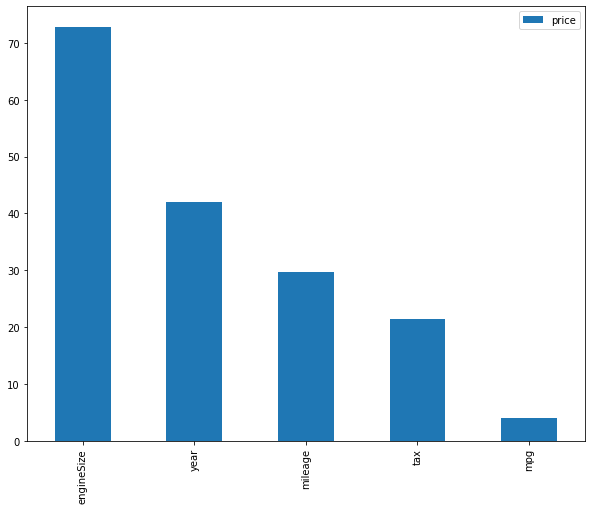

In [14]:
pd.DataFrame(abs(df1.corr()['price'].drop('price')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))

**We will use all the numeric columns based on the correlation with price**

### For the Object columns

In [15]:
df1.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [16]:
df1['model'].value_counts()

 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64

In [17]:
df1['transmission'].value_counts()

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

In [18]:
df1['fuelType'].value_counts()

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64

## Modeling
#### Using pd.get_dummies on the categorical Columns

In [19]:
df1 = pd.get_dummies(df1, columns=["model", "transmission","fuelType"], drop_first=False)
df1.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016,16000,24089,265,36.2,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2017,15995,18615,145,36.2,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2015,13998,27469,265,36.2,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2017,18998,14736,150,36.2,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2017,17498,36284,145,36.2,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [20]:
X = df1.drop('price', axis=1)
X.head()

,year,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016,24089,265,36.2,2.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2017,18615,145,36.2,2.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2015,27469,265,36.2,2.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2017,14736,150,36.2,2.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2017,36284,145,36.2,2.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
X.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ Auris',
       'model_ Avensis', 'model_ Aygo', 'model_ C-HR', 'model_ Camry',
       'model_ Corolla', 'model_ GT86', 'model_ Hilux', 'model_ IQ',
       'model_ Land Cruiser', 'model_ PROACE VERSO', 'model_ Prius',
       'model_ RAV4', 'model_ Supra', 'model_ Urban Cruiser', 'model_ Verso',
       'model_ Verso-S', 'model_ Yaris', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto',
       'fuelType_Diesel', 'fuelType_Hybrid', 'fuelType_Other',
       'fuelType_Petrol'],
      dtype='object')

In [22]:
y = df[['price']]
y.head()

,price
0,16000
1,15995
2,13998
3,18998
4,17498


### Train Test Split
**Lets split our dataset**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4716, 31) (4716, 1)
Test set: (2022, 31) (2022, 1)


In [24]:
# Standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Libraries for plotting

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price ($)')
    plt.ylabel('Proportion')
    plt.legend()

    plt.show()
    plt.close()
    

### USING SEVERAL REGRESION MODELS

In [26]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()), ("poly",PolynomialFeatures(degree=2, include_bias=False)),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor(max_depth=10,min_samples_leaf=0.1,random_state=4))])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor(random_state=4))])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor(random_state=4))])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [27]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], -1*cv_score.mean()))

LinearRegression: 8186908330521.393555 
DecisionTree: 3470.288173 
RandomForest: 1217.386963 
KNeighbors: 1416.080979 
XGBRegressor: 1173.947215 


Testing the Model with the best score on the test set

In the above scores, XGBRegressor appears to be the model with the best scoring on negative root mean square error. Let's test this model on a test set and evaluate it with different parameters.

In [28]:
# Model prediction on test data using XGBOOST
pred = pipeline_xgb.predict(X_test)

In [29]:
# Model Evaluation XGBClassifier
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9635510118955093
Adjusted R^2: 0.9629832135883539
MAE: 766.9866504461664
MSE: 1502777.1297191118
RMSE: 1225.8781055713132


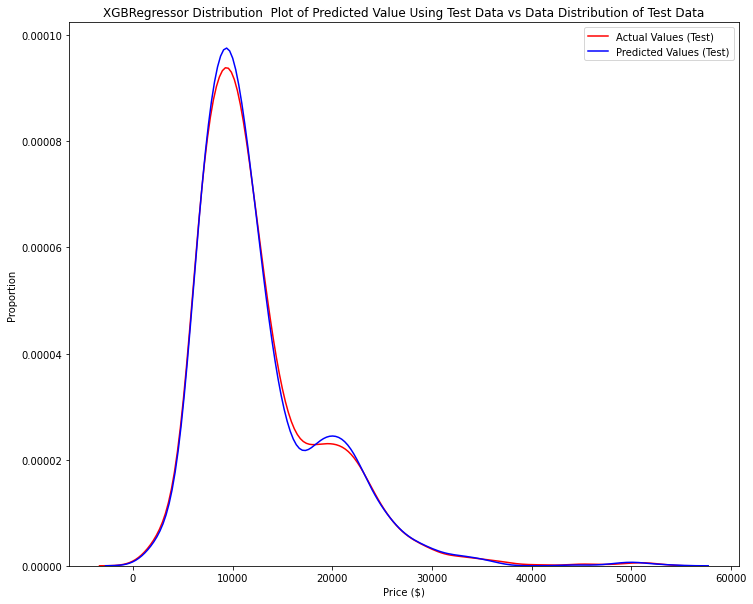

In [30]:
Title='XGBRegressor Distribution  Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,pred,"Actual Values (Test)","Predicted Values (Test)",Title)

### Lets evaluate with RandomForestRegressor

In [31]:
# Model Evaluation Random Forest Regressor
predr = pipeline_rf.predict(X_test)

print("R^2:",metrics.r2_score(y_test, predr))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predr))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predr))
print("MSE:",metrics.mean_squared_error(y_test, predr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predr)))

R^2: 0.9591558849627657
Adjusted R^2: 0.9585196198541455
MAE: 821.7079120743252
MSE: 1683986.4466363576
RMSE: 1297.6850336797283


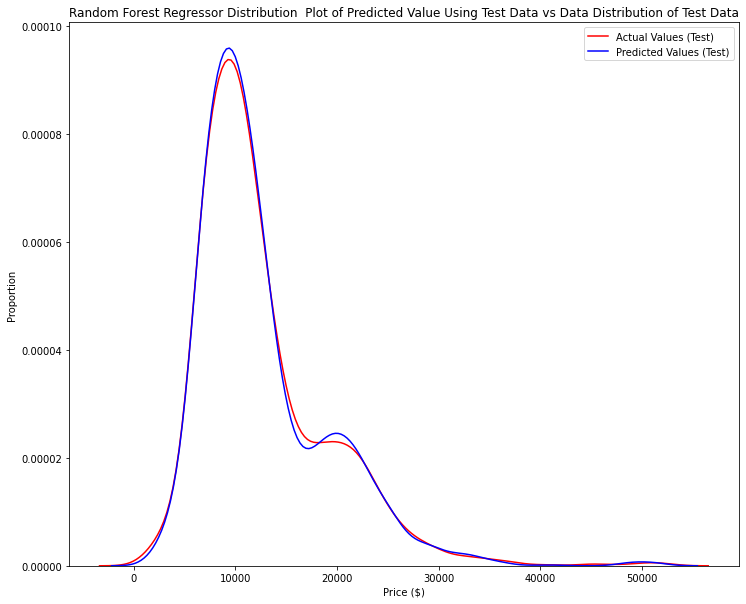

In [32]:
Title='Random Forest Regressor Distribution  Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,predr,"Actual Values (Test)","Predicted Values (Test)",Title)

## Lets get the important features using RandomForest

In [33]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
predrf = rf.predict(X_test)

In [34]:
print("R^2:",metrics.r2_score(y_test, predrf))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predrf))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predrf))
print("MSE:",metrics.mean_squared_error(y_test, predrf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R^2: 0.9602606689762261
Adjusted R^2: 0.9596416140708306
MAE: 819.8197336206491
MSE: 1638436.6458038057
RMSE: 1280.0143146870685


In [35]:
importances = pd.Series(data=rf.feature_importances_,
                        index= X.columns)

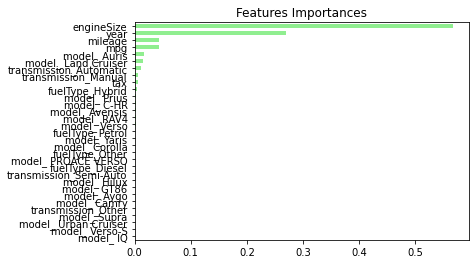

In [36]:
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

## R Scores
In all **XGBOOST REGRESSOR** and **RANDOM FOREST REGRESSOR** are of higher R SCORE and performed better

### Lets create a Dataframe of actual prices and the predicted prices

In [37]:
pred1 = np.round(pred)

In [38]:
pred_x = pd.DataFrame({"predictions":pred1},index=y_test.index)
pred_x.head()

,predictions
630,12589.0
1105,8342.0
1859,13323.0
20,27222.0
1372,12165.0


In [39]:
prices = pd.concat([y_test,pred_x],axis=1)
prices.head()

,price,predictions
630,11804,12589.0
1105,7498,8342.0
1859,13444,13323.0
20,26995,27222.0
1372,11495,12165.0


### Use the Trained Model

First, let's save the model.

In [40]:
import joblib

# Save the model as a pickle file
filename = 'models-toyota-price.pkl'
joblib.dump(pipeline_xgb, filename)

['models-toyota-price.pkl']

Now, we can load it whenever we need it, and use it to predict labels for new data. This is often called *scoring* or *inferencing*.

### Lets use our model to predict a hybrid 2022 Toyota camry with 620 mileage, $100 tax, 40mpg,2.0 engine size with automatic transmission 

In [41]:
#Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[2022,620,100,40.0,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} price'.format(np.round(result[0])))

New sample: [2022.0, 620.0, 100.0, 40.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Prediction: 21942 price
